In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

from helper_functions import distance_between_points

In [68]:
# reading the data
disasters_df = pd.read_csv('./datasets/public_emdat_disasters.csv')

disasters_df = disasters_df.copy()
disasters_df['Year'] = disasters_df['DisNo.']
disasters_df['Year'] = disasters_df['Year'].apply(lambda x: int((str(x).split("-"))[0]))

# drop rows with nan lat long coords
disasters_df.dropna(how='any', subset=['Latitude', 'Longitude'], inplace=True)

Plotting the lat long coords of disasters across the world

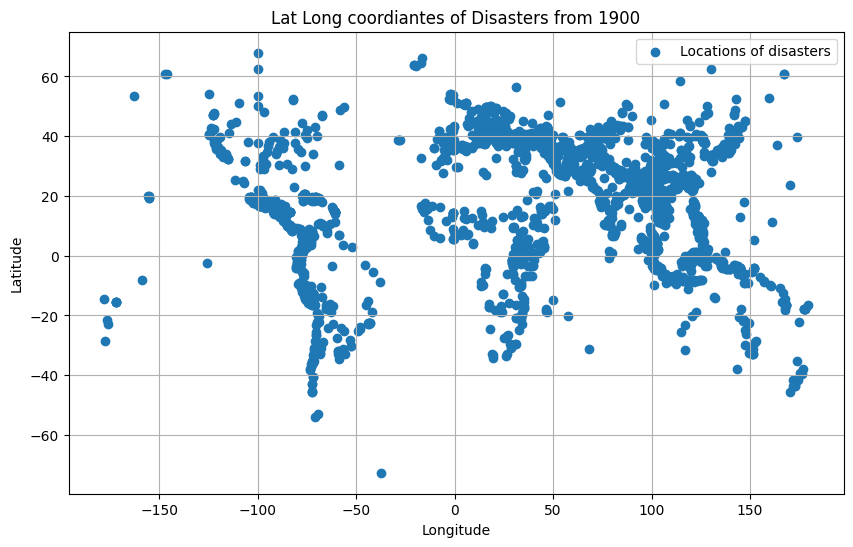

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(disasters_df['Longitude'], disasters_df['Latitude'], label="Locations of disasters")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lat Long coordiantes of Disasters from 1900')
plt.legend()
plt.grid(True)


Same as the plot above but mapped with colours that represent the year in which the disaster happened

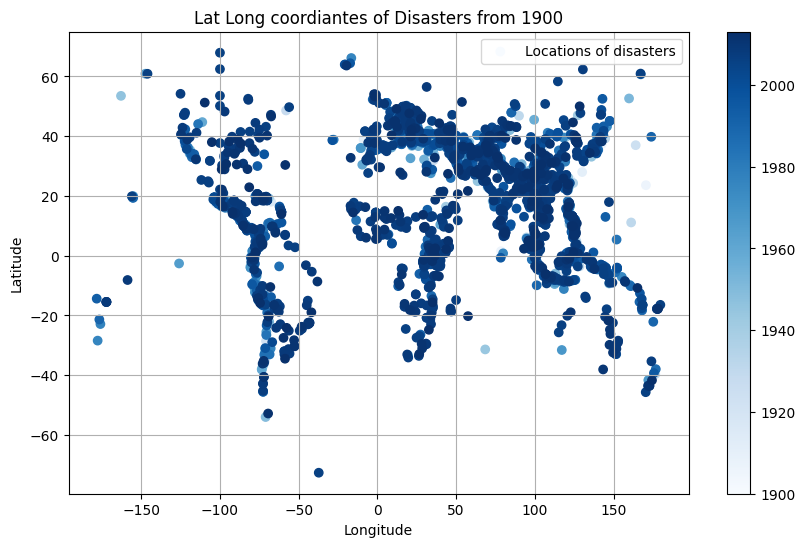

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(disasters_df['Longitude'], disasters_df['Latitude'], label="Locations of disasters", c=disasters_df['Year'], cmap='Blues')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lat Long coordiantes of Disasters from 1900')
plt.legend()
plt.colorbar()
plt.grid(True)
plt.show()

Clustering the values based on distances from each other - this can be done with kmeans

Need to change the below method

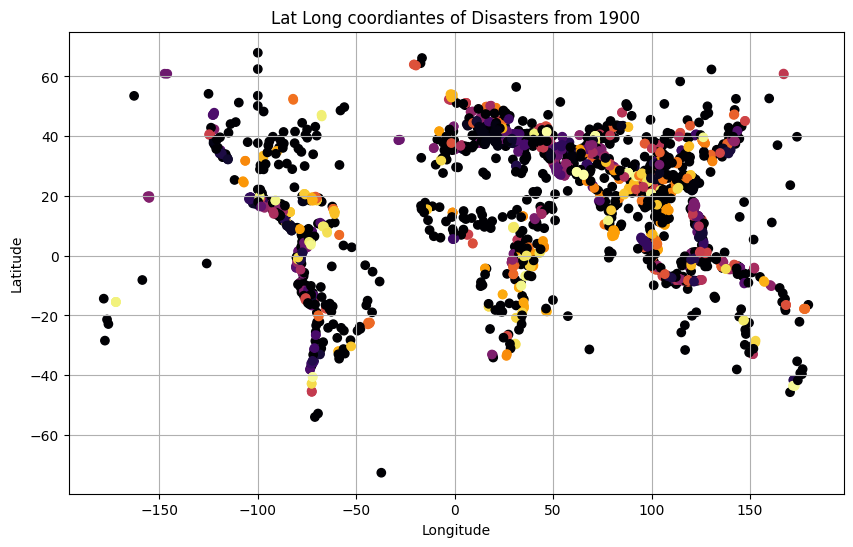

In [71]:
points = disasters_df[['Latitude', 'Longitude']].to_numpy()

# need to change these parameters around
data = DBSCAN(eps=75, min_samples=2, metric=distance_between_points).fit(points)

clusters = data.labels_

plt.figure(figsize=(10, 6))
plt.scatter(disasters_df['Longitude'], disasters_df['Latitude'], label="Locations of disasters", c=clusters, cmap='inferno')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lat Long coordiantes of Disasters from 1900')
plt.grid(True)
plt.show()


Scatter plot with colourmap representing the amount of deaths

In [72]:
# drop rows with nan deaths
disasters_df.dropna(subset=['Total_Deaths'], inplace=True)

# drop rows below a number of deaths threshold
deaths_threshold = 50
disasters_df = disasters_df[disasters_df.Total_Deaths >= deaths_threshold]

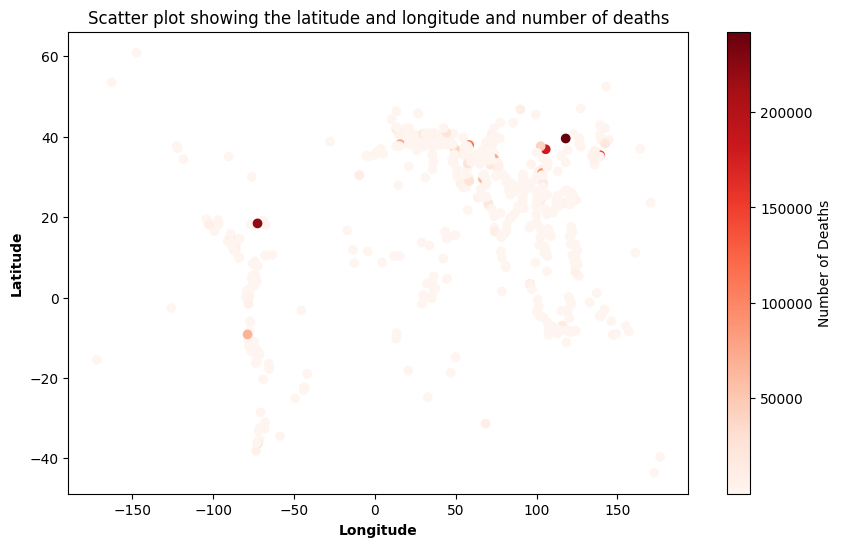

In [73]:

plt.figure(figsize=(10, 6))
plt.scatter(disasters_df['Longitude'], disasters_df['Latitude'], c=disasters_df['Total_Deaths'], cmap='Reds')

plt.title('Scatter plot showing the latitude and longitude and number of deaths')
plt.xlabel('Longitude', fontweight ='bold') 
plt.ylabel('Latitude', fontweight ='bold') 
plt.colorbar(label='Number of Deaths')
plt.show()

3D scatter plot representing deaths

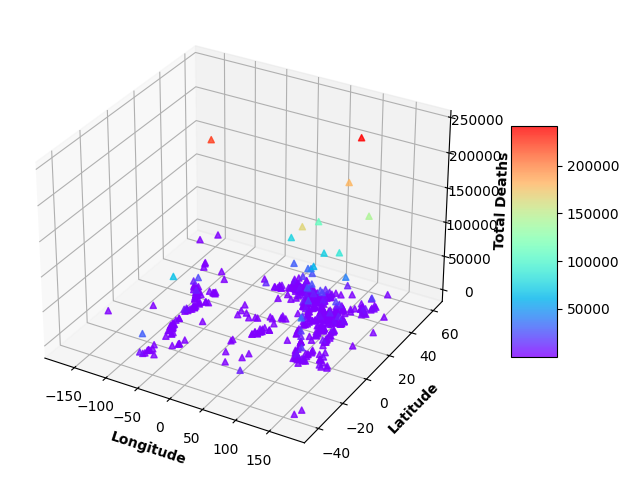

In [74]:
from mpl_toolkits import mplot3d



fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')

# adding gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2)


x, y, z = disasters_df['Longitude'], disasters_df['Latitude'], disasters_df['Total_Deaths']
sctt = ax.scatter3D(x, y, z, alpha = 0.8, c = z, cmap='rainbow', marker ='^')

ax.set_xlabel('Longitude', fontweight ='bold') 
ax.set_ylabel('Latitude', fontweight ='bold') 
ax.set_zlabel('Total Deaths', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()


We can see that the data is a little bit patchy here and most entries with valid lat long coords have 0 deaths associated to them.